In [2]:
# Import the packages that could be useful
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline
import statsmodels.api as sm

In [3]:
data = pd.read_csv('diabetes.csv')
df = data.copy()

# Diabetes Project - The Start

## First, I will get a quick snapshot of the data to make sure that I understand it.

In [4]:
df.shape

(768, 9)

In [17]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [18]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [19]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [20]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [21]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [22]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## It looks like this data has already been cleaned. Yay!

# Data Exploration

<AxesSubplot:>

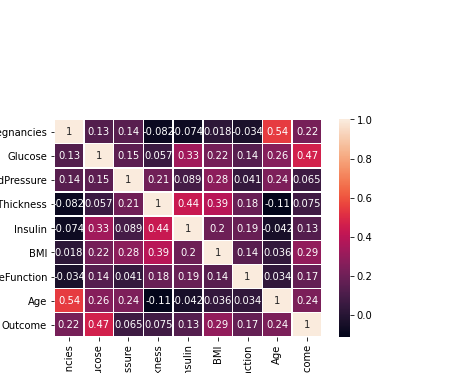

In [24]:
sns.heatmap(df.corr(), annot=True, linewidths=.5)

In [25]:
print(df.corr())

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137

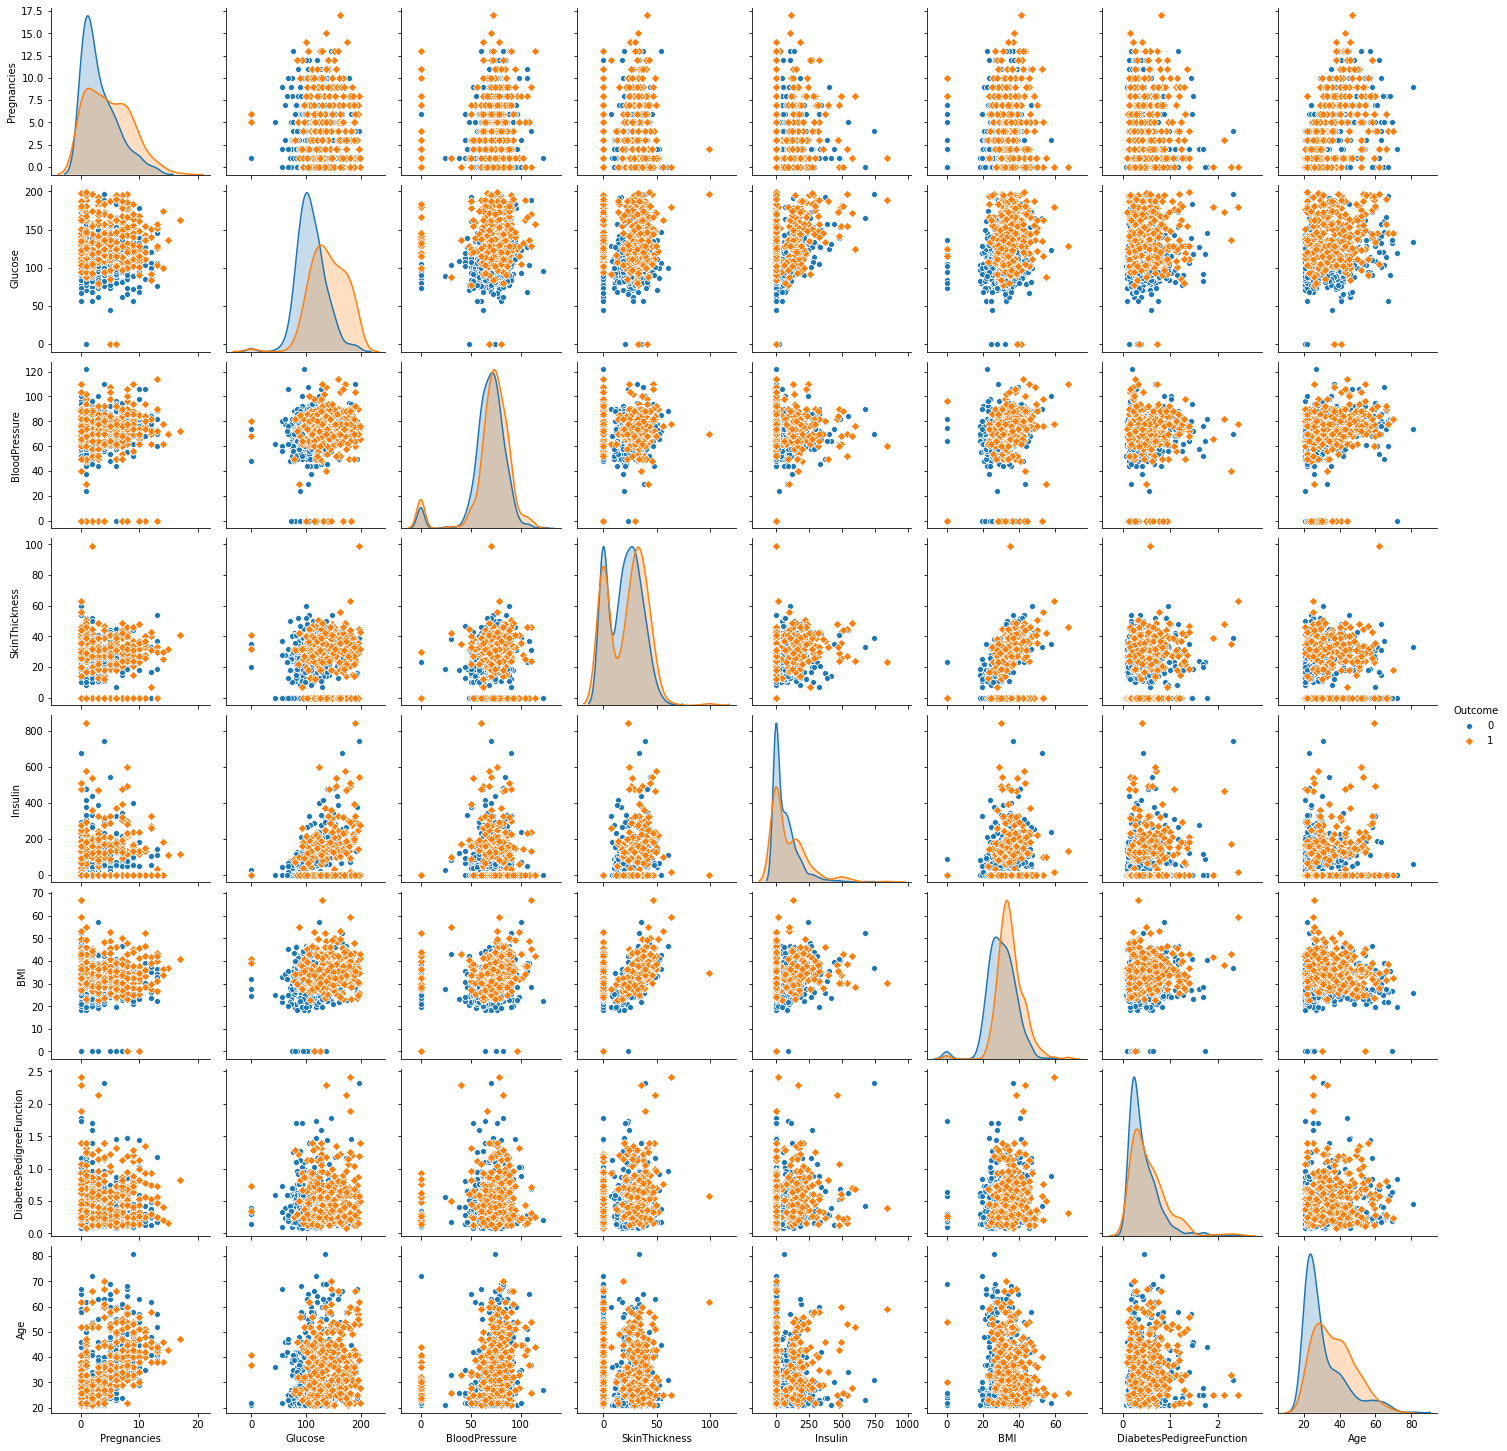

In [6]:
sns.pairplot(df, hue = 'Outcome', markers=["o", "D"])

In [27]:
# From this, we can see that most people did not test positive for diabetes
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

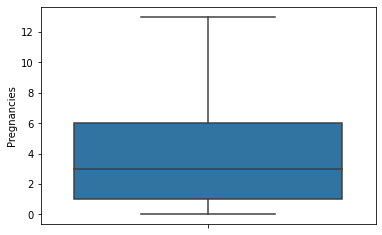

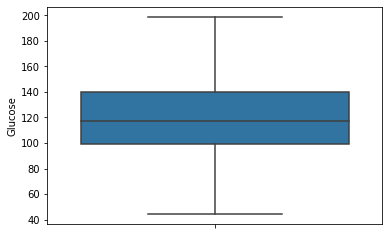

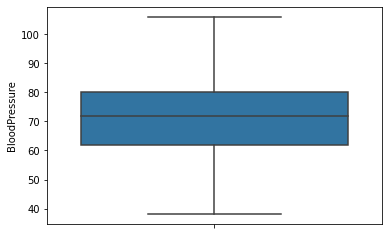

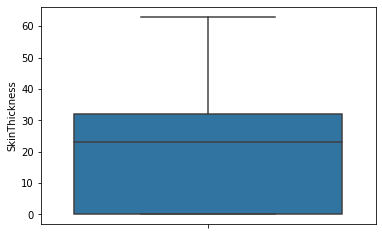

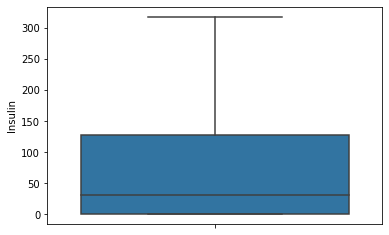

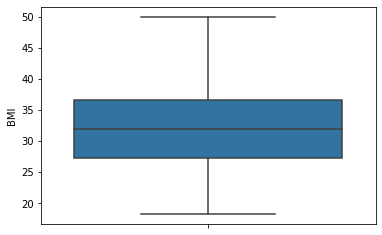

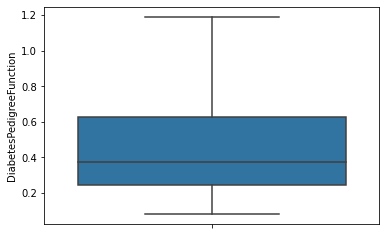

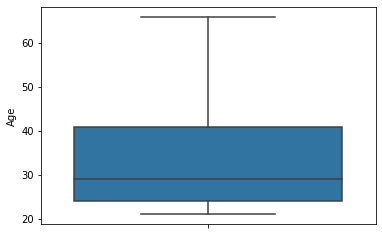

In [28]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in columns:
    chart = sns.boxplot(y=df[str(col)], showfliers = False)
    plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

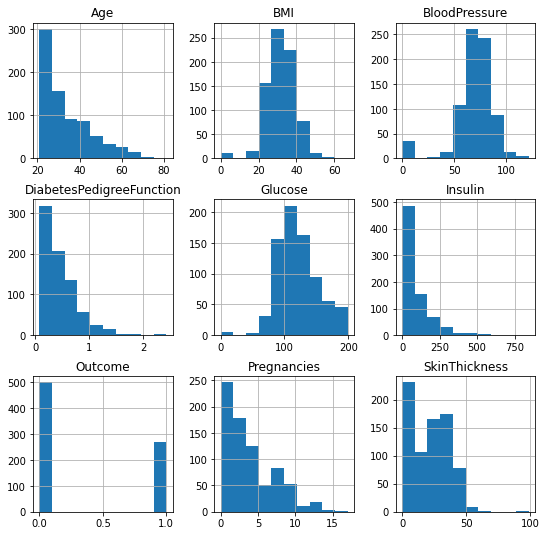

In [29]:
df.hist(figsize=(9,9))

In [30]:
# Find correlations using regression
X = df.drop('Outcome', axis = 1)
y = df['Outcome'].values

In [31]:
X_sm = X = sm.add_constant(X)

In [32]:
model = sm.OLS(y, X_sm)

In [33]:
# From the R-squared value, I can tell that using ordinary least squares regression will not work well for my model, however it does give some useful information regarding which variables are important. I can see that the variables SkinThickness and Insulin have little impact on the outcome, however, given that this model is very inaccurate, I will not base my featuers off of this observation
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           7.36e-55
Time:                        11:33:29   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

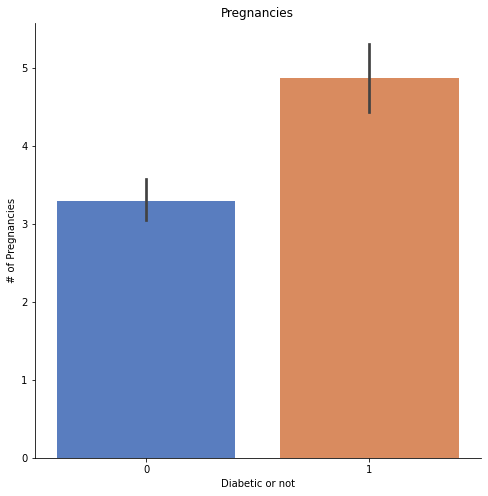

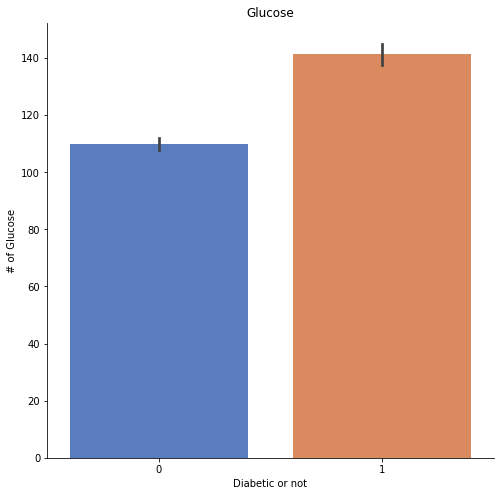

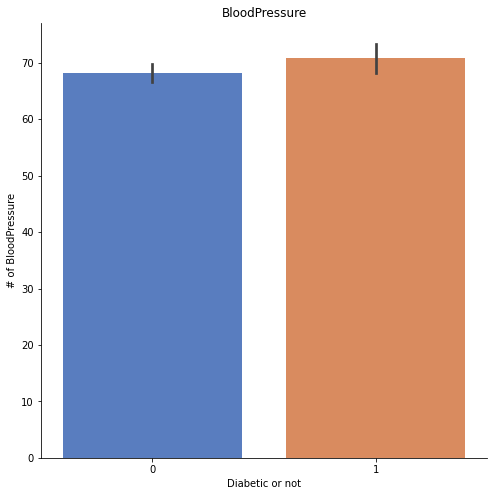

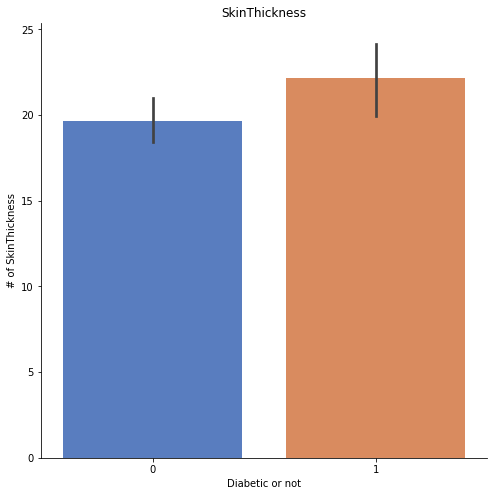

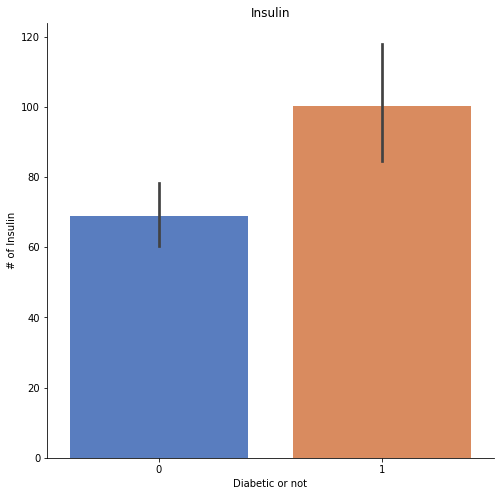

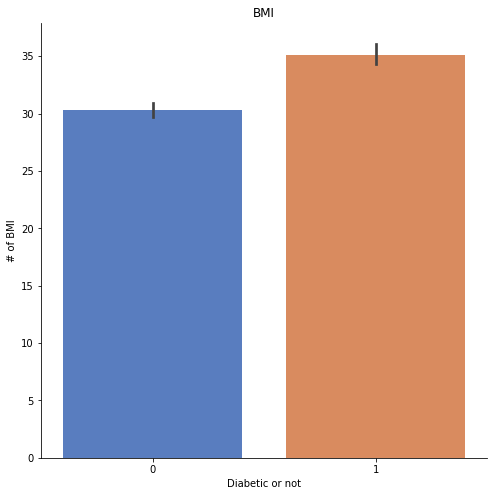

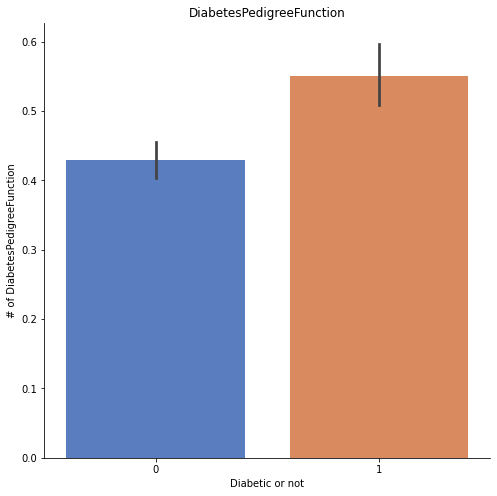

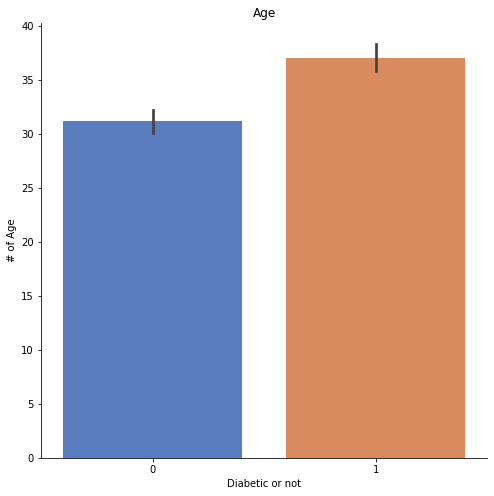

In [34]:
# Analyzing the distribution of each variable in relation to their outcome
for col in columns:
    plt.figure(figsize=(8,8))
    plt.xticks([0,1],['Non-Diabetic','Diabetic'])
    sns.barplot(x='Outcome',y=str(col),data=df,palette='muted')
    plt.xlabel('Diabetic or not')
    plt.ylabel('# of ' + str(col))
    plt.title(str(col))
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

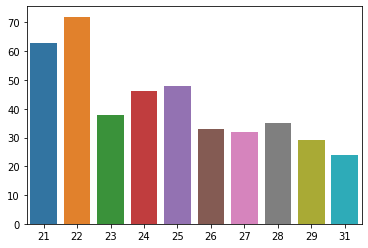

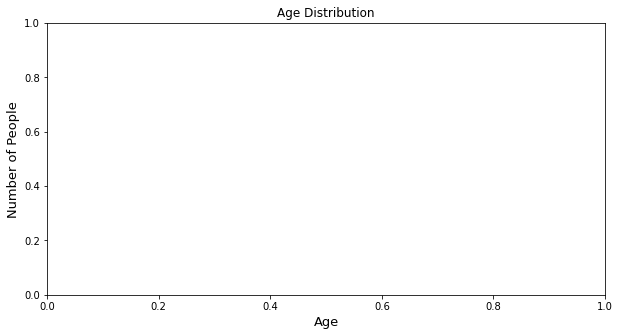

In [35]:
age_count  = df['Age'].value_counts()
age_count = age_count[:10,]
sns.barplot(age_count.index, age_count.values, alpha=1)
plt.figure(figsize=(10,5))
plt.title('Age Distribution')
plt.ylabel('Number of People', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.show()

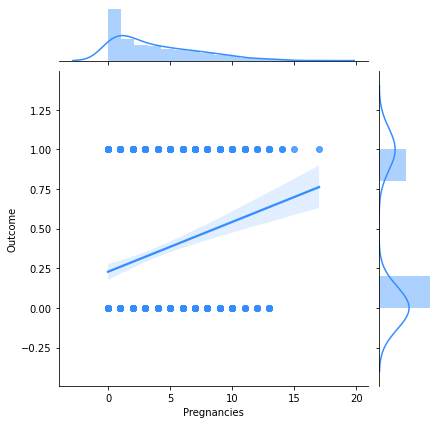

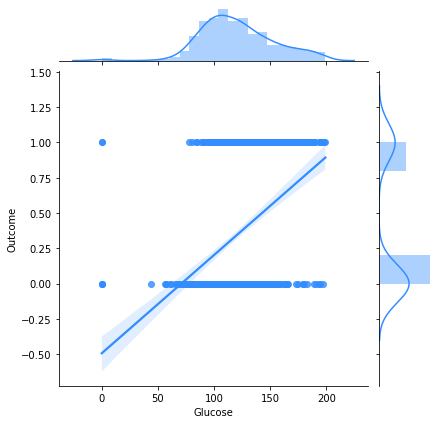

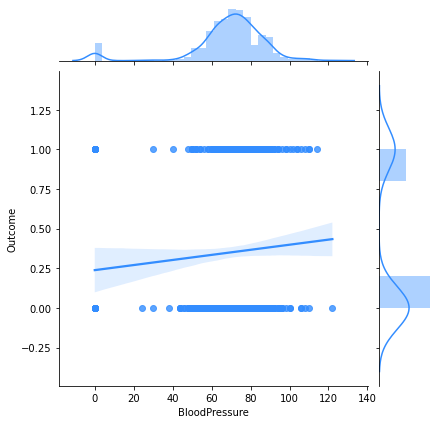

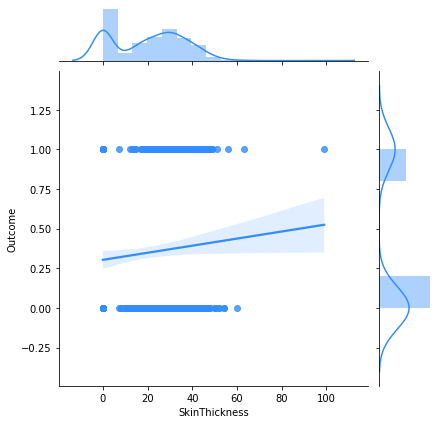

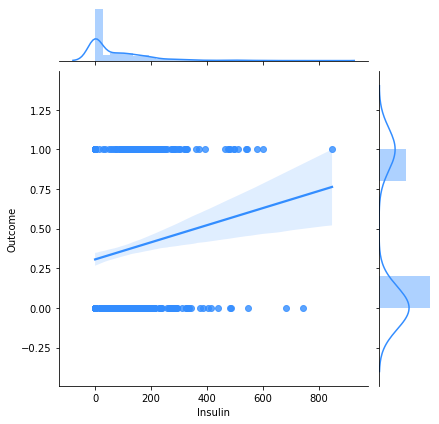

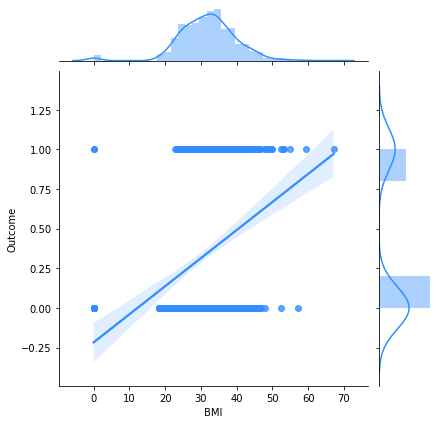

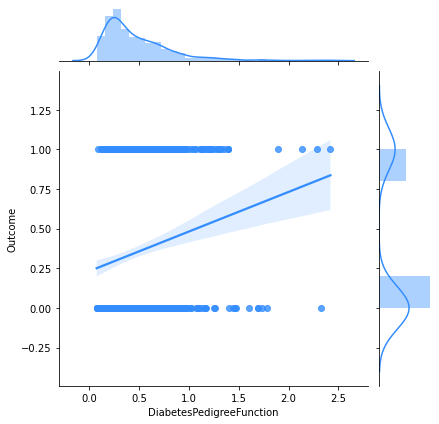

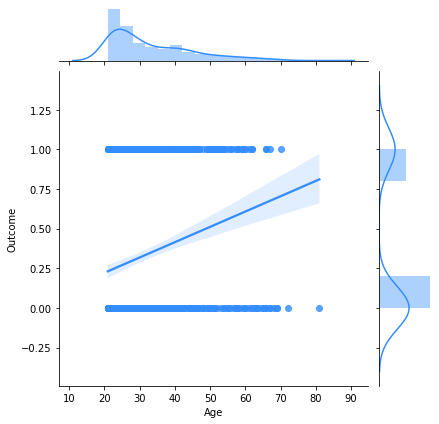

In [36]:
for col in columns:
    sns.jointplot(df.loc[:,str(col)], df.loc[:,'Outcome'], kind="regg", color="#338DFF")

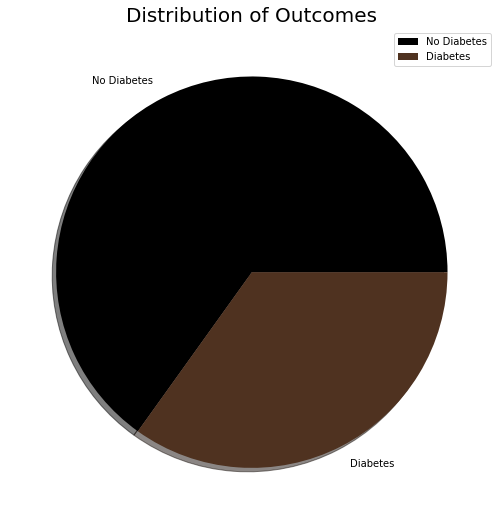

In [37]:
labels = ['No Diabetes', 'Diabetes']
owtcome = df['Outcome'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(owtcome, labels = labels, colors = colors,  shadow = True)
plt.title('Distribution of Outcomes', fontsize = 20)
plt.legend()
plt.show()

In [38]:
# Further analyzing age and its affect on outcome
oldppl = df.loc[df['Age'] > 50].index.to_list()
oppl = df.loc[oldppl]
oppl

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
..           ...      ...            ...            ...      ...   ...   
719            5       97             76             27        0  35.6   
734            2      105             75              0        0  23.3   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
763           10      101             76             48      180  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
8                       0.158   53        1  
9                       0.232   54        1  
12                      1.441   57        0  
13                      0.398   59        1  
14                      0.587   51        1  
..                        ...  ...      ...  
719                     0.378   52        1  
734                     0.560   53        0  
757                     0.258   52        1  
759                     0.278   66        1  
763                     0.171   63        0  

[81 rows x 9 columns]

<AxesSubplot:xlabel='Age', ylabel='count'>

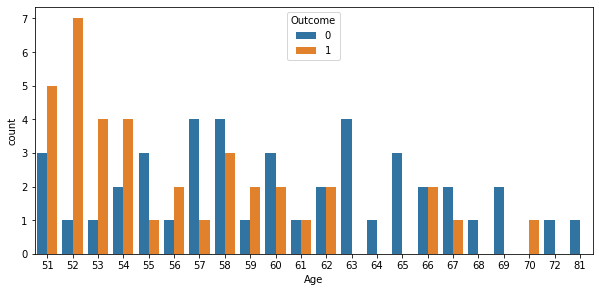

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.countplot(x='Age',hue='Outcome',data= oppl)

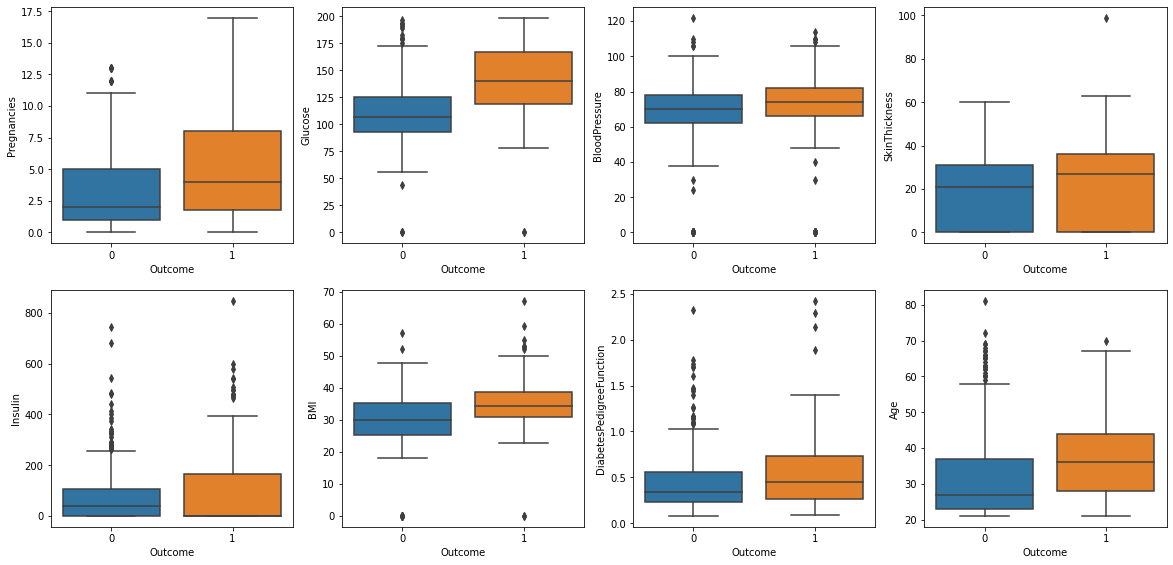

In [9]:
plt.figure(figsize=(20,20))
for column_index, column in enumerate(df.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.boxplot(x='Outcome', y=column, data=df)